In [3]:
import numpy as np

In [4]:
resolution = [3, 4]
height = np.random.rand(*resolution)

xlen = 5
ylen = 5

vertex_locations = np.zeros(tuple(resolution+[3]))
for x in range(resolution[0]):
    for y in range(resolution[1]):
        vertex_locations[x,y, 0] = xlen/resolution[0]*x -xlen/2
        vertex_locations[x,y, 1] = ylen/resolution[1]*y -ylen/2
        vertex_locations[x,y, 2] = height[x,y]

vertices = vertex_locations.reshape(-1,3)
min_z = np.min(vertex_locations[:,-1]) -0.1
vertex_ends = np.array([vertex_locations[0,0, :], 
               vertex_locations[-1,0, :],
               vertex_locations[-1,-1, :],
               vertex_locations[0,-1, :]])

vertex_ends[:,-1] = min_z

idx_0_0 = len(vertices)
idx_l_0 = len(vertices)+1
idx_l_l = len(vertices)+2
idx_0_l = len(vertices)+3
vertices = np.concatenate((vertices, vertex_ends), axis = 0)

triangles = []
for idx_x in range(resolution[0]-1):
    for idx_y in range(resolution[1]-1):
        curr_vertex = idx_x*resolution[1] + idx_y
        vertex_top = (idx_x + 1)*resolution[1] + idx_y
        vertex_right = idx_x*resolution[1] + idx_y+1
        vertex_right_top = (idx_x + 1)*resolution[1] + (idx_y+1)
        triangles.append([curr_vertex, vertex_right, vertex_right_top])
        triangles.append([curr_vertex, vertex_right_top, vertex_top])

triangles.append([idx_0_0, idx_l_0, idx_l_l])
triangles.append([idx_0_0, idx_l_l, idx_0_l])

In [5]:
def save_obj(file_path, vertices, triangles):
    with open(file_path, 'w') as obj_file:
        # Write vertices
        for vertex in vertices:
            formatted_vertex = ' '.join(format(coord, '.4f') for coord in vertex)
            obj_file.write(f"v {formatted_vertex}\n")

        # Write triangles
        for triangle in triangles[:-1]:
            obj_file.write(f"f {' '.join(map(str, triangle))}\n")
        obj_file.write(f"f {' '.join(map(str, triangles[-1]))}")

In [6]:
save_obj('test2.obj', vertices, triangles)

In [19]:
triangles

[[0, 1, 5],
 [0, 5, 4],
 [1, 2, 6],
 [1, 6, 5],
 [2, 3, 7],
 [2, 7, 6],
 [4, 5, 9],
 [4, 9, 8],
 [5, 6, 10],
 [5, 10, 9],
 [6, 7, 11],
 [6, 11, 10],
 [12, 13, 14],
 [12, 14, 15]]

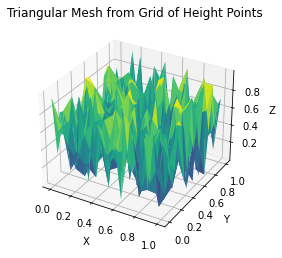

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

def generate_trimesh(grid_size):
    # Generate a grid of height points
    x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
    z = np.random.rand(grid_size, grid_size)  # You can replace this with your own height data
    
    # Flatten the arrays for Delaunay triangulation
    points = np.column_stack((x.flatten(), y.flatten(), z.flatten()))
    
    # Perform Delaunay triangulation
    tri = Delaunay(points[:, :2])

    # Create the trimesh
    trimesh = {'vertices': points, 'faces': tri.simplices}

    return trimesh

def plot_trimesh(trimesh):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trimesh
    ax.plot_trisurf(trimesh['vertices'][:, 0], trimesh['vertices'][:, 1], trimesh['vertices'][:, 2],
                    triangles=trimesh['faces'], cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Triangular Mesh from Grid of Height Points')

    plt.show()

grid_size = 20  # Adjust the grid size as needed
trimesh = generate_trimesh(grid_size)
plot_trimesh(trimesh)

In [11]:
save_obj('test3.obj', trimesh['vertices'] , trimesh['faces'])

In [36]:
idx_x = 3
idx_y = 24

curr_vertex = idx_x*resolution[1] + idx_y

print(vertex_locations[idx_x, idx_y])
print(vertices[curr_vertex])

[-26.4        -10.4          0.62076542]
[-26.4        -10.4          0.62076542]


In [24]:
vertex_locations[0,:]

array([[-30.        , -20.        ,   0.05476442],
       [-30.        , -16.        ,   0.82901909],
       [-30.        , -12.        ,   0.06528609],
       [-30.        ,  -8.        ,   0.08220584],
       [-30.        ,  -4.        ,   0.06059738],
       [-30.        ,   0.        ,   0.43300009],
       [-30.        ,   4.        ,   0.07892403],
       [-30.        ,   8.        ,   0.39585374],
       [-30.        ,  12.        ,   0.93001028],
       [-30.        ,  16.        ,   0.23018456]])

In [29]:
vertices[0:resolution[1], :]

array([[-30.        , -20.        ,   0.05476442],
       [-30.        , -16.        ,   0.82901909],
       [-30.        , -12.        ,   0.06528609],
       [-30.        ,  -8.        ,   0.08220584],
       [-30.        ,  -4.        ,   0.06059738],
       [-30.        ,   0.        ,   0.43300009],
       [-30.        ,   4.        ,   0.07892403],
       [-30.        ,   8.        ,   0.39585374],
       [-30.        ,  12.        ,   0.93001028],
       [-30.        ,  16.        ,   0.23018456]])

In [27]:
resolution[0]

5